<a href="https://colab.research.google.com/github/YousraAshour/machine_learning/blob/main/ADAM_Mini_Batch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import pandas as pd
from sklearn.metrics import r2_score , mean_squared_error

In [3]:
data=pd.read_csv(r'/MultipleLR.csv - MultipleLR.csv.csv',header=None)
data=np.asarray(data)
x=data[:,:3].reshape(-1,3)
x=np.c_[np.ones((len(x),1)),x]
xx=np.c_[np.ones((len(x),1)),x]
y=data[:,3].reshape(-1,1)
y.shape


(25, 1)

In [24]:
m=np.zeros((1,x.shape[1]))
v=np.zeros((1,x.shape[1]))
Theta=np.zeros((1,x.shape[1])).reshape(1,x.shape[1])
epochs= 5000
B1=0.9
B2=0.999
eps=10**-8
alpha= 0.009
batch=4


def Adam_MiniBatch (x,y,m,v,eps,alpha,batch,epochs,Theta,B1,B2):
  losses=[]
  iters=[]
  iter=0
  Theta0=[]
  Theta1=[]
  Theta2=[]
  Theta3=[]
  for e in range (epochs):
          
               
          for i in range (x.shape[0]//batch):
              
                X = x[i * batch:(i + 1) * batch,:]
                Y = y[i * batch:(i + 1) * batch,:]
                # print('Theta',Theta.shape)

                h=np.dot(X,np.transpose(Theta))
                # print('h',h.shape)
                # print('y',Y.shape)

                err= h-Y
                # print('err',err.shape)
                loss= (1/(2*batch))* np.dot(np.transpose(err),err)
                losses.append(loss)
                # print('loss',loss.shape)
                grad= 1/batch * np.dot(np.transpose(err),X)
                # print('grad',grad.shape)

                m=(B1*m)+((1-B1)*(grad))
                # print('m',m.shape)
                m_cor=(m)/(1-(B1**(i+1)))
                  
                v=(B2*v)+((1-B2)*(grad)**2)

                # print('v',v.shape)
                v_cor=(v)/(1-(B2**(i+1)))
                  
                Theta= Theta - alpha*(m_cor/(np.sqrt(v_cor)+eps))
                Theta= Theta.reshape(1,x.shape[1])
                # print('Theta', Theta)
                Theta0.append(Theta[:,0])
                Theta1.append(Theta[:,1])
                Theta2.append(Theta[:,2])
                Theta3.append(Theta[:,3])

                iters.append(iter)
                iter+=1
           
  return Theta, losses ,iters,Theta0,Theta1,Theta2,Theta3


In [25]:
Theta, losses,iters,Theta0,Theta1,Theta2,Theta3 =  Adam_MiniBatch (x,y,m,v,eps,alpha,batch,epochs,Theta,B1,B2)
y_pred= np.dot(x,np.transpose(Theta))
score=r2_score(y,y_pred)
score


0.9894215949679966

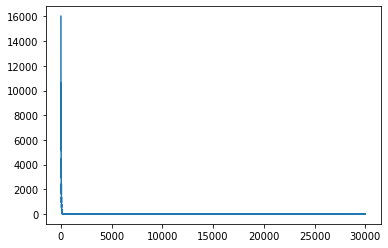

In [26]:
losses=np.asarray(losses).reshape(-1,1)
plt.plot(losses)

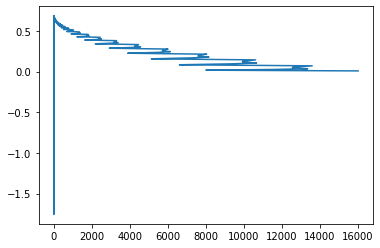

In [27]:
plt.plot(losses,Theta0)

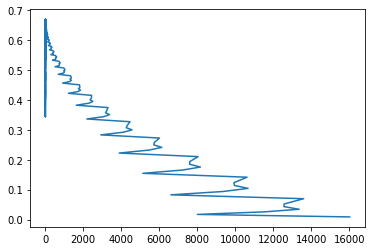

In [28]:
plt.plot(losses,Theta1)


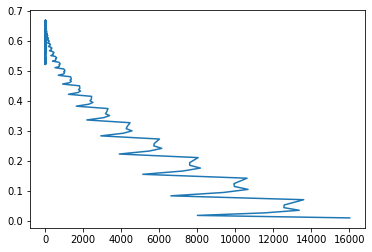

In [29]:
plt.plot(losses,Theta2)


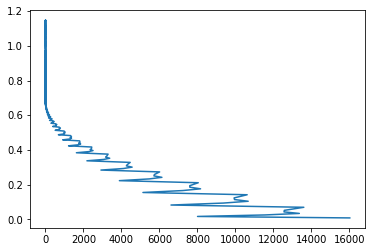

In [30]:
plt.plot(losses,Theta3)
